# Final Milestone - CS109A - Andreas Vandris, Milton Syed, Vinay Iyengar

## December 14, 2016

## Overview

In [1]:
import numpy as np
import geopy
from geopy.distance import vincenty
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
%matplotlib inline

Let's start by reading in the dataset

In [2]:
data = pd.read_csv("Property_Assessment_2016.csv", low_memory=False)
data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,LATITUDE,LONGITUDE
0,1102128015,NaN,1102128015,276,AMORY,ST,NaN,2130,986,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1702569001,NaN,1702569000,976,MORTON,ST,NaN,2126,985,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1800079000,NaN,1800079000,,GLENMORE,ST,NaN,2126,902,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.272123,-71.077953
3,1801014000,NaN,1801014000,459,RIVER,ST,NaN,2126,985,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.268792,-71.092651
4,1802070000,NaN,1802070000,,ROCKINGHAM,RD,NaN,2126,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.270165,-71.103090


A lot of weird variables. Going to take variables after column 21 (since these are more relevant) and convert categorical variables to numbers

In [3]:
# convert dummy variables to numbers
df = data.iloc[:,21:]
data_exp = pd.DataFrame({})
for column in df.columns:
    # convert anything that is a string
    if df[column].dtype == np.dtype('object') :
        # use dummy to convert categories
        encoding = pd.get_dummies(df[column])
        # concatenate new catergory
        data_exp = pd.concat([data_exp, encoding], axis=1)
    else:
        # if not new category, just append to matrix
        data_exp = pd.concat([data_exp, df[[column]]], axis=1)
data_exp

,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,0,1,A,B,C,...,G,P,A,E,F,G,P,S,LATITUDE,LONGITUDE
0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.272123,-71.077953
3,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.268792,-71.092651
4,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.270165,-71.103090
5,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.276071,-71.097266
6,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.277845,-71.097407
7,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.335426,-71.108149
9,0,NaN,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.327691,-71.098235


In [100]:
# impute data 
def processor(modified_x):
    imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
    modified_x = imp.fit_transform(modified_x)
    return modified_x

data_exp_imp = processor(data_exp)

In [5]:
linreg_base = LinearRegression()
y = data["AV_TOTAL"]
linreg_base.fit(data_exp_imp,y)
linreg_base.score(data_exp_imp, y)

0.18662779292623288

In [84]:
residuals_base = abs(y - linreg_base.score(data_exp_imp, y))
avg_residuals_base = np.average(residuals_base)
print "Average Residual LinReg Base:", avg_residuals_base

Average Residual LinReg Base: 2154767.70891


In [6]:
ridge_base = Ridge(alpha=10)
ridge_base.fit(data_exp_imp,y)
ridge_base.score(data_exp_imp, y)

0.18658511275096057

### Guess like our bench mark linear regression sample performs at .1865, let's see if we can use feature selection to improve our score

### LDA or Random Forest models not working for our baseline dataset because too much data

## Data Exploration and Feature Selection

In this part, we perused through the data and plotted them against the y-variable to see if there were any relationships. Here are a couple below

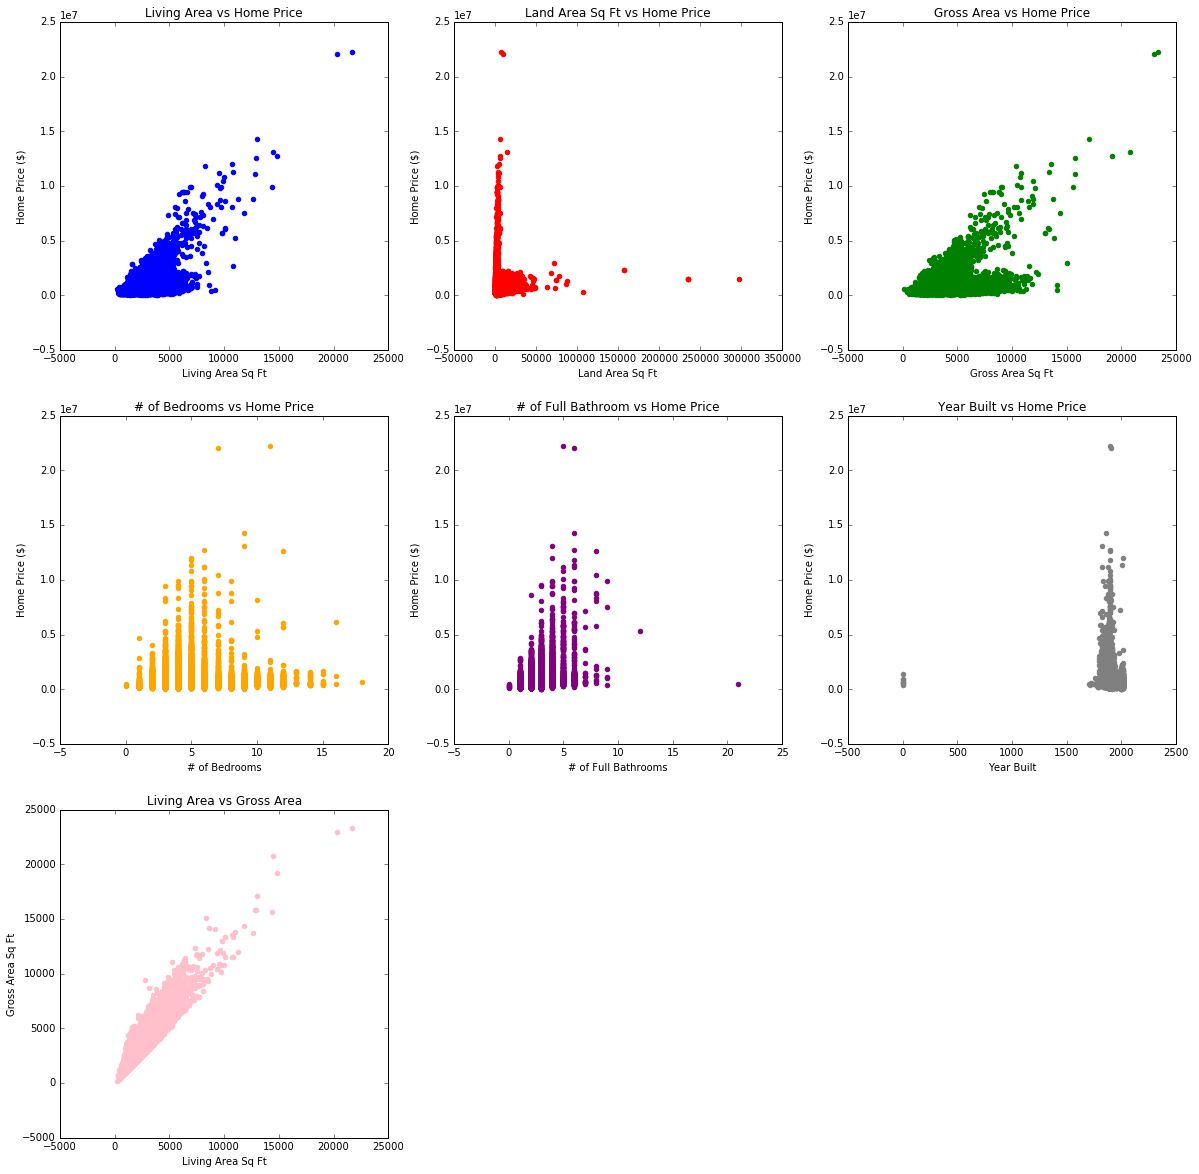

In [9]:
fig = plt.figure(figsize = (20,20))
def plotter(x,y,subplot,xlab,ylab,title,color):
    ax_1 = fig.add_subplot(subplot)
    ax_1.scatter(x,y, color=color)
    ax_1.set_xlabel(xlab)
    ax_1.set_ylabel(ylab)
    ax_1.set_title(title)
    
# clean plots without missing data (remove them)

# living area
home_price_la = data_clean[data_clean["LIVING_AREA"] != None]["AV_TOTAL"]
living_area = data_clean[data_clean["LIVING_AREA"] != None]["LIVING_AREA"]

# LAND_SF
home_price_sf = data_clean[data_clean["LAND_SF"] != None]["AV_TOTAL"]
land_sf = data_clean[data_clean["LAND_SF"] != None]["LAND_SF"]

# gross area
home_price_ga = data_clean[data_clean["GROSS_AREA"] != None]["AV_TOTAL"]
gross_area = data_clean[data_clean["GROSS_AREA"] != None]["GROSS_AREA"]

# bedrooms
home_price_bd = data_clean[data_clean["R_BDRMS"] != None]["AV_TOTAL"]
bedrooms = data_clean[data_clean["R_BDRMS"] != None]["R_BDRMS"]

# full bathrooms
home_price_br = data_clean[data_clean["R_FULL_BTH"] != None]["AV_TOTAL"]
full_bathroom = data_clean[data_clean["R_FULL_BTH"] != None]["R_FULL_BTH"]

# Year Built
home_price_y = data_clean[data_clean["YR_BUILT"] != None]["AV_TOTAL"]
yr_built = data_clean[data_clean["YR_BUILT"] != None]["YR_BUILT"]


plotter(living_area, home_price_la, 331,"Living Area Sq Ft","Home Price ($)","Living Area vs Home Price","b")
plotter(land_sf, home_price_sf, 332,"Land Area Sq Ft","Home Price ($)","Land Area Sq Ft vs Home Price","r")
plotter(gross_area, home_price_ga, 333,"Gross Area Sq Ft","Home Price ($)","Gross Area vs Home Price","g")
plotter(bedrooms, home_price_bd, 334,"# of Bedrooms","Home Price ($)","# of Bedrooms vs Home Price","orange")
plotter(full_bathroom, home_price_br, 335,"# of Full Bathrooms","Home Price ($)","# of Full Bathroom vs Home Price","purple")
plotter(yr_built, home_price_y, 336,"Year Built","Home Price ($)","Year Built vs Home Price","gray")
plotter(living_area, gross_area, 337,"Living Area Sq Ft","Gross Area Sq Ft","Living Area vs Gross Area","pink")





    

These are some good indicators to use, the other variables in the dataset are mostly incomplete or do not add much value at all. These are some of the best ones since there are clear relationships

In [25]:
# fit with only living area, as that was a linear regression
x_living_area = data_clean_exp.iloc[:, 1].values.reshape(len(y_clean), 1)
linreg_2 = LinearRegression()
linreg_2.fit(x_living_area, y_clean)
print "Living Area score:", linreg_2.score(x_living_area, y_clean)


Living Area score: 0.189666122824


Living area alone adds a lot of value - this is a signficant contributor

## Perform data cleaning

In [7]:
# perform data cleaning
# extract relevant columns
stuff = [data["AV_TOTAL"], data["LIVING_AREA"], data["LAND_SF"], data["GROSS_AREA"], data["R_BDRMS"], data["R_FULL_BTH"], data["YR_BUILT"], data["R_BLDG_STYL"], data["LATITUDE"], data["LONGITUDE"]]
data_clean = pd.concat(stuff, axis=1)
data_clean

,AV_TOTAL,LIVING_AREA,LAND_SF,GROSS_AREA,R_BDRMS,R_FULL_BTH,YR_BUILT,R_BLDG_STYL,LATITUDE,LONGITUDE
0,7900,NaN,243,NaN,NaN,NaN,0,NaN,NaN,NaN
1,152000,0,NaN,0,NaN,NaN,0,NaN,NaN,NaN
2,20600,0,2963,0,NaN,NaN,0,NaN,42.272123,-71.077953
3,520800,0,26825,0,NaN,NaN,0,NaN,42.268792,-71.092651
4,20800,0,4000,0,NaN,NaN,0,NaN,42.270165,-71.103090
5,22500,0,4000,0,NaN,NaN,0,NaN,42.276071,-71.097266
6,2200,0,845,0,NaN,NaN,0,NaN,42.277845,-71.097407
7,1100,0,113,0,NaN,NaN,0,NaN,NaN,NaN
8,70100,NaN,1200,NaN,NaN,NaN,NaN,NaN,42.335426,-71.108149
9,42500,0,1796,0,NaN,NaN,0,NaN,42.327691,-71.098235


In [8]:
# clean and get parts of data that is complete
data_clean = data_clean[data_clean["AV_TOTAL"] != 0]
data_clean = data_clean.dropna()
data_clean.describe()

,AV_TOTAL,LIVING_AREA,LAND_SF,GROSS_AREA,R_BDRMS,R_FULL_BTH,YR_BUILT,LATITUDE,LONGITUDE
count,62560.000000,62560.000000,62560.000000,62560.000000,62560.000000,62560.000000,62560.000000,62560.000000,62560.000000
mean,527882.196995,2404.851343,4790.196148,3828.632465,4.636061,2.026822,1918.464898,42.306544,-71.097481
std,481304.339109,1034.101872,3713.457728,1474.468529,1.959866,0.909314,36.837283,0.036510,0.041817
min,38118.000000,160.000000,0.000000,160.000000,0.000000,0.000000,0.000000,42.232075,-71.174695
25%,347800.000000,1574.000000,3036.000000,2616.000000,3.000000,1.000000,1900.000000,42.280376,-71.131980
50%,430500.000000,2240.000000,4431.000000,3594.000000,4.000000,2.000000,1910.000000,42.296017,-71.095109
75%,561200.000000,3105.000000,5870.000000,4892.000000,6.000000,3.000000,1935.000000,42.332062,-71.064826
max,22207400.000000,21711.000000,297883.000000,23335.000000,18.000000,21.000000,2015.000000,42.392649,-70.995995


It seems that the mean house price is 527882 dollars with a standard deviation of 481300 which means the data is widely spread out. Addtionally, the median is signficantly lower than the mean, which means the data is right-skewed.

Looks like Living Area, Gross Area are linearly connected, so I will choose only one of them in my variable. Also need 
to do one hot encoding for the building style. Time to fit a linear model to it.

In [10]:
df = data_clean
data_clean_exp = pd.DataFrame({})
for column in data_clean.columns:
    # convert anything that is a string
    if df[column].dtype == np.dtype('object'):
        # use dummy to convert categories
        encoding = pd.get_dummies(df[column])
        # concatenate new catergory
        data_clean_exp = pd.concat([data_clean_exp, encoding], axis=1)
    else:
        # if not new category, just append to matrix
        data_clean_exp = pd.concat([data_clean_exp, df[[column]]], axis=1)
data_clean_exp

,AV_TOTAL,LIVING_AREA,LAND_SF,GROSS_AREA,R_BDRMS,R_FULL_BTH,YR_BUILT,BW,CL,CN,...,RN,RR,SD,SL,TD,TF,TL,VT,LATITUDE,LONGITUDE
259,548300,2016,1850,2748,5,3,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333729,-71.102243
260,628600,2016,1440,2688,5,1,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333780,-71.102211
261,606900,2016,1440,2688,4,1,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333824,-71.102182
262,670500,2324,1440,2880,3,3,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333869,-71.102155
263,669300,2016,1440,2688,4,3,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333913,-71.102127
264,612700,2016,1440,2800,3,2,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.333958,-71.102099
265,711400,2026,1440,2712,4,1,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.334003,-71.102071
266,779900,2080,1440,3270,4,4,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.334048,-71.102043
268,892300,2582,1440,3168,4,3,1875,0,0,0,...,0,0,0,0,0,0,0,0,42.334138,-71.101987
272,682100,2016,1440,2688,4,2,1900,0,0,0,...,0,0,0,0,0,0,0,0,42.334228,-71.101931


Graph of some building styles

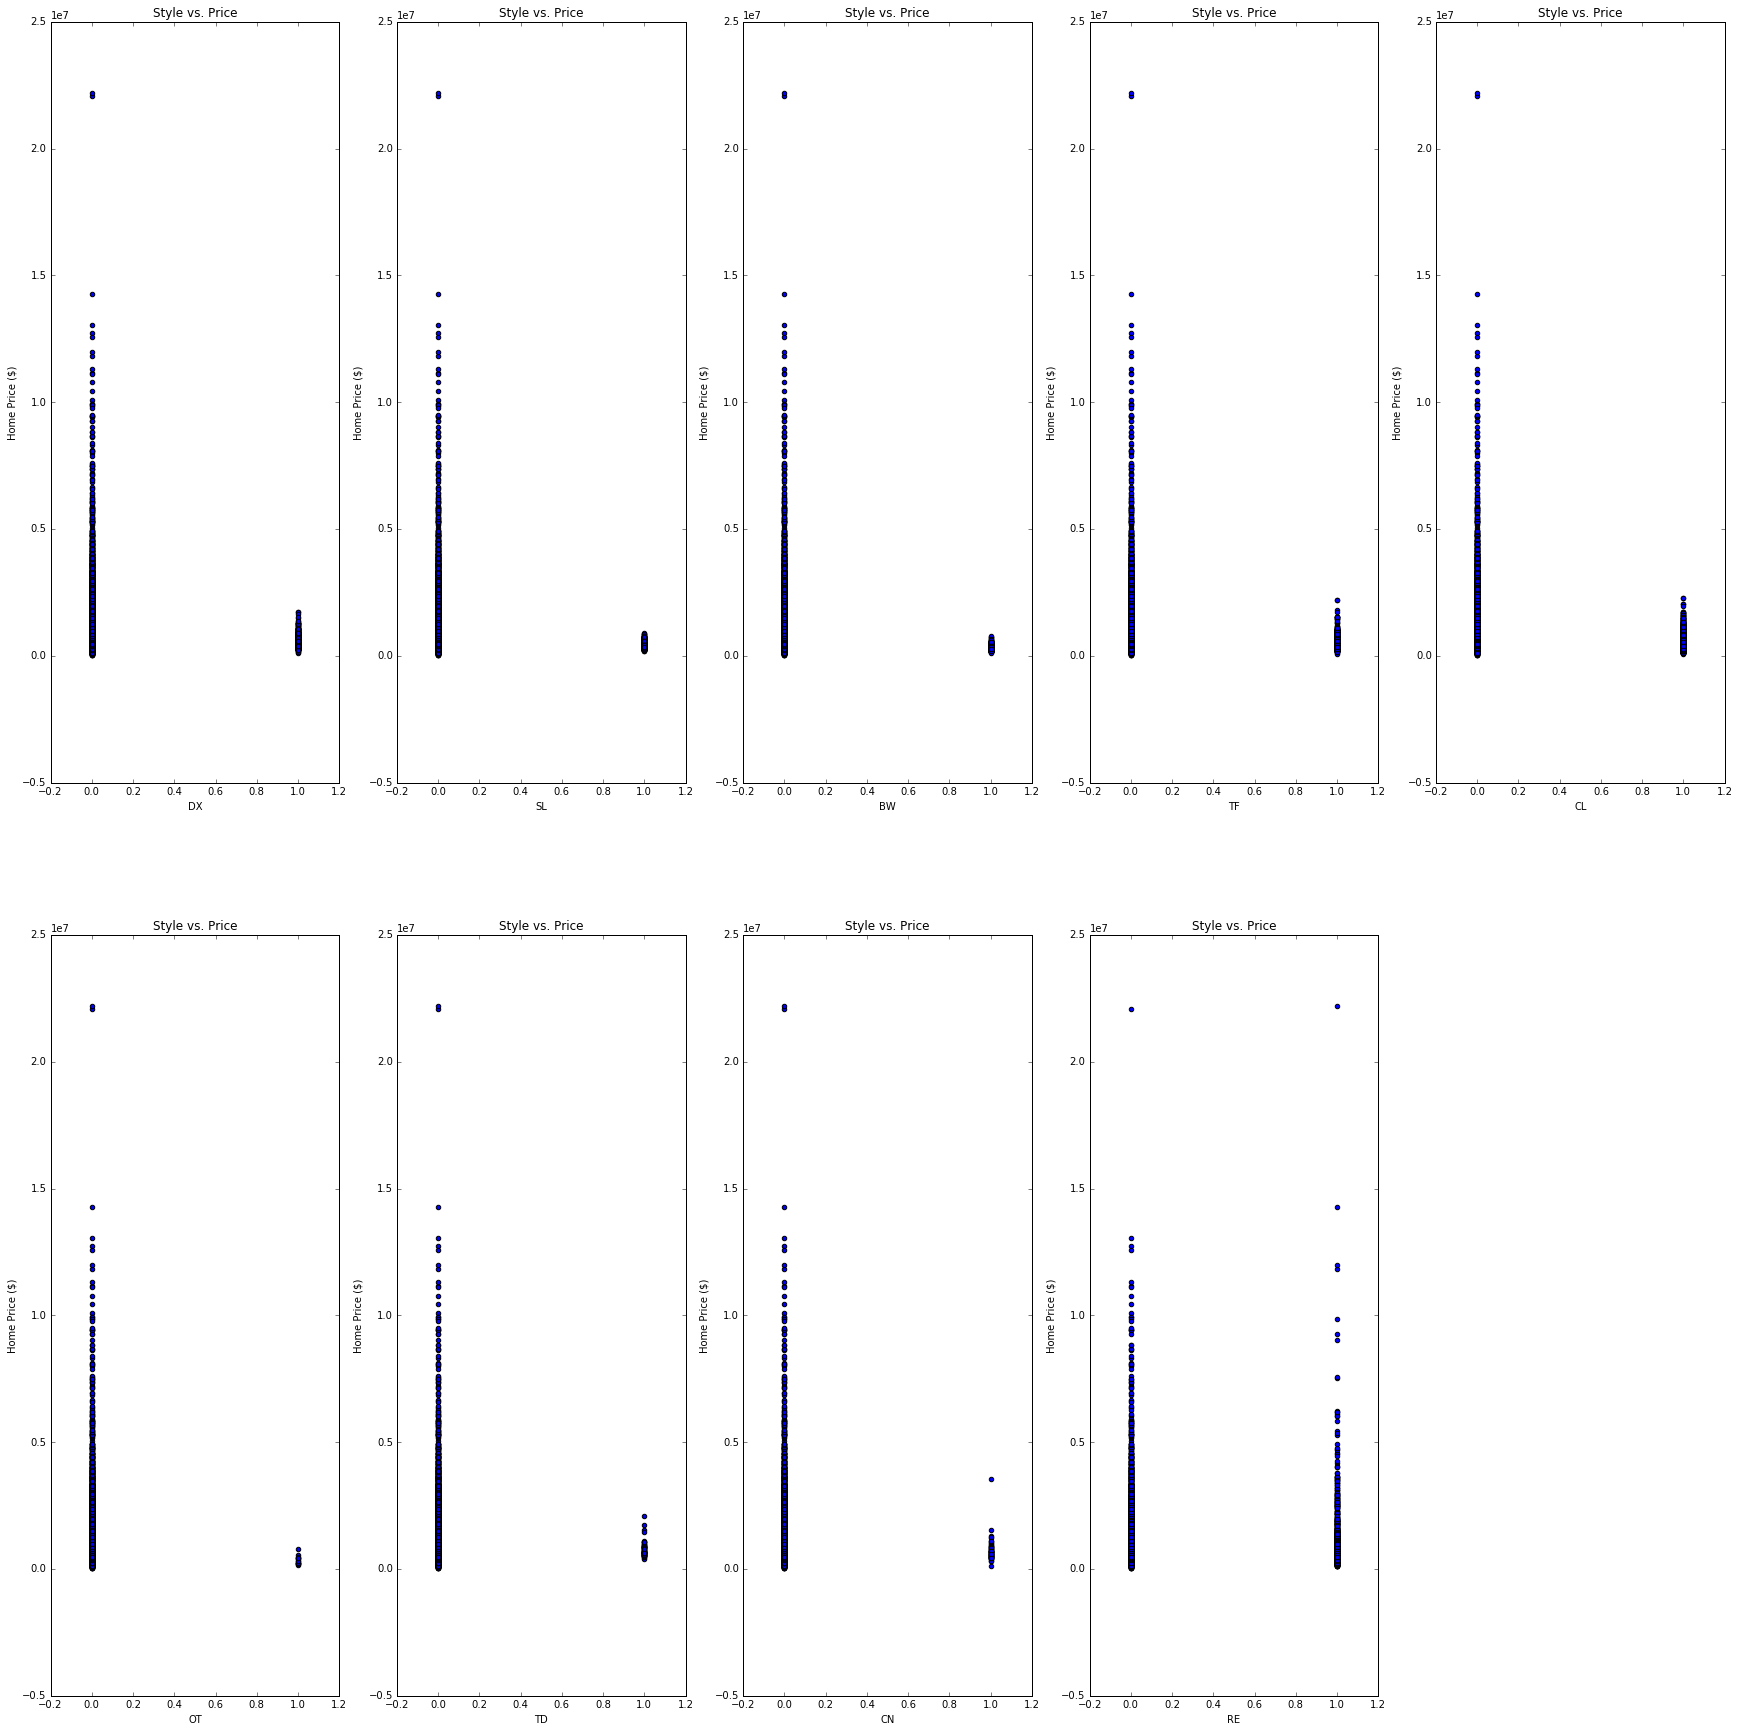

In [11]:
style = ["DX", "SL", "BW", "TF", "CL", "OT", "TD", "CN", "RE", "SD", "CP", "RM", "VT", "CV", "RN", "DK", "RR"]
fig = plt.figure(figsize = (30,30))
def plotter(x,y,subplot,xlab,ylab,title):
    ax_1 = fig.add_subplot(subplot)
    ax_1.scatter(x,y)
    ax_1.set_xlabel(xlab)
    ax_1.set_ylabel(ylab)
    ax_1.set_title(title)
subplot = 251
for i in style[:9]:
    plotter(data_clean_exp[i], data_clean_exp["AV_TOTAL"],subplot, i, "Home Price ($)", "Style vs. Price")
    subplot += 1


Seems like RE gives it a higher indication that it is more expensive

In [38]:
# get x data and y_clean data
x = data_clean_exp.iloc[:, 1:]
y_clean = data_clean_exp.iloc[:, 0]

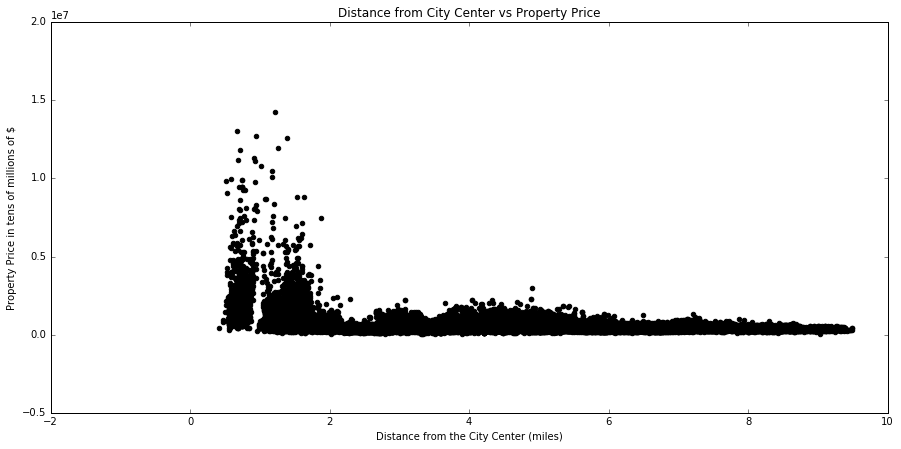

In [94]:
# find distance from the city center (Financial district) using the Latitude Longitiude Coordinate
distance = []
fin_dist_bost = (42.355972, -71.054978)

# get distances
for i in x.values:
    temp_coor = (i[-2],i[-1])
    distance.append(vincenty(temp_coor,fin_dist_bost).miles)
    
fig = plt.figure(figsize=(15,7))    
plt.scatter(distance, y_clean, color="black")
plt.xlabel("Distance from the City Center (miles)")
plt.ylabel("Property Price in tens of millions of $")
plt.ylim(-.5e7, 2e7)
plt.title("Distance from City Center vs Property Price")

### Investigating whether location affects price

As you can see, the most expensive homes are the ones closest to the financial district (hence the peak at 0). As you move away from the financial district, the price of the homes decrease in a 1/x function fashion

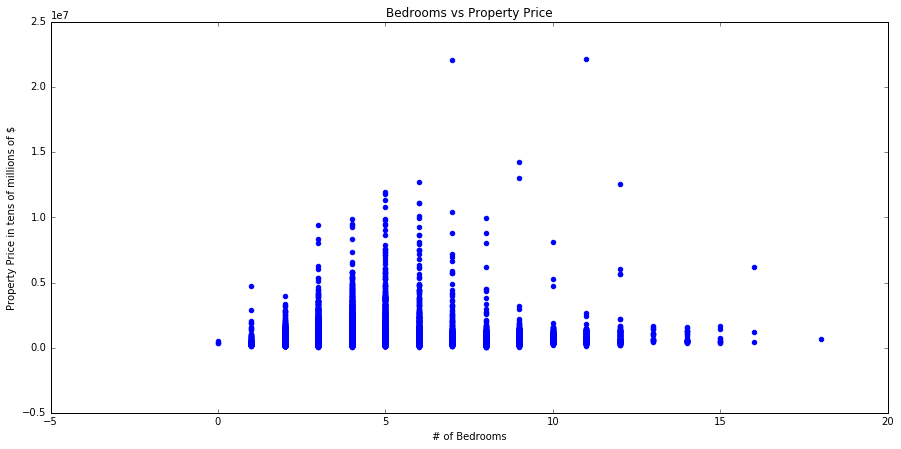

In [95]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(x["R_BDRMS"], y_clean, color="blue")
plt.xlabel("# of Bedrooms")
plt.ylabel("Property Price in tens of millions of $")
plt.title("Bedrooms vs Property Price")

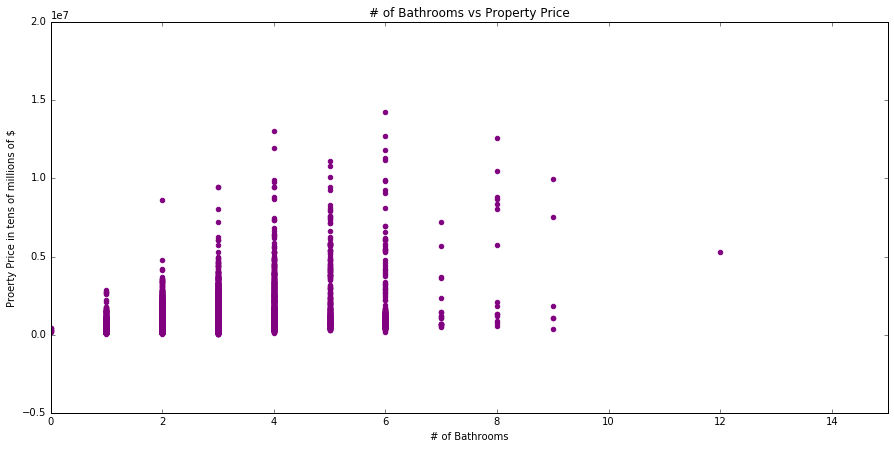

In [99]:
# plot bathrooms
fig = plt.figure(figsize=(15, 7))
plt.scatter(x["R_FULL_BTH"], y_clean, color="purple")
plt.xlabel("# of Bathrooms")
plt.ylabel("Proerty Price in tens of millions of $")
plt.ylim(-.5e7, 2e7)
plt.xlim(0, 15)
plt.title("# of Bathrooms vs Property Price")

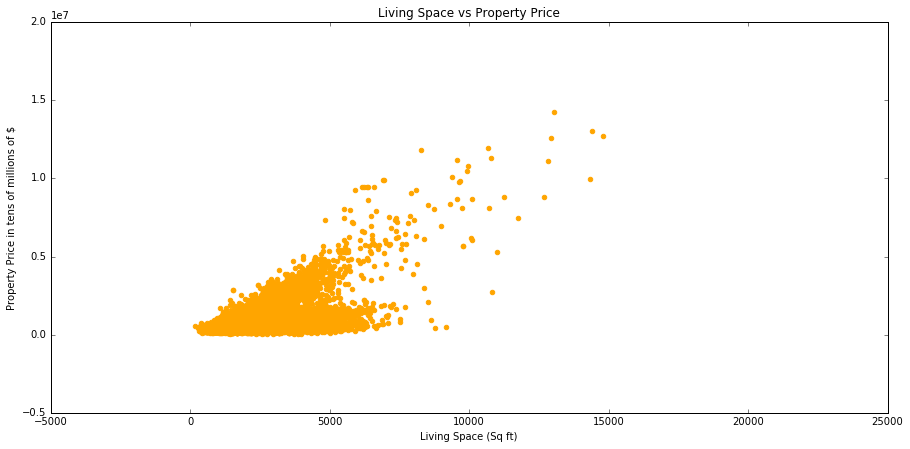

In [90]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(x["LIVING_AREA"], y_clean, color="orange")
plt.xlabel("Living Space (Sq ft)")
plt.ylabel("Property Price in tens of millions of $")
plt.ylim(-.5e7, 2e7)
plt.title("Living Space vs Property Price")

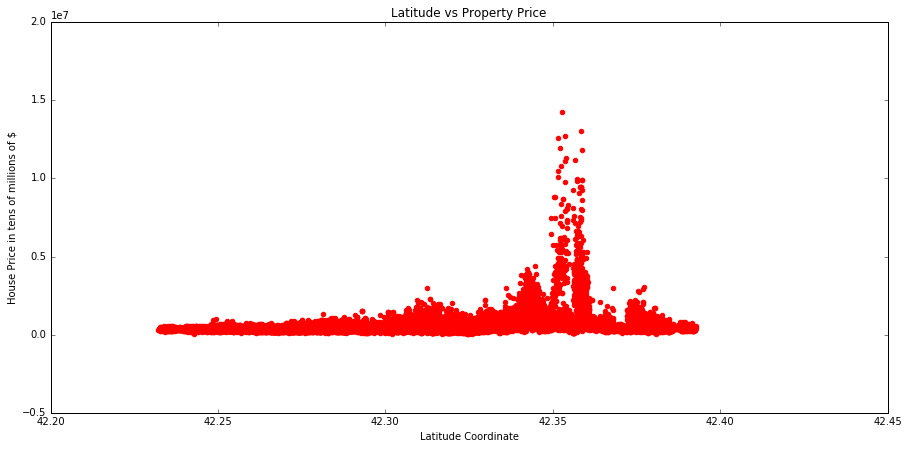

In [96]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(x["LATITUDE"], y_clean, color="red")
plt.xlabel("Latitude Coordinate")
plt.ylabel("House Price in tens of millions of $")
plt.ylim(-.5e7, 2e7)
plt.title("Latitude vs Property Price")

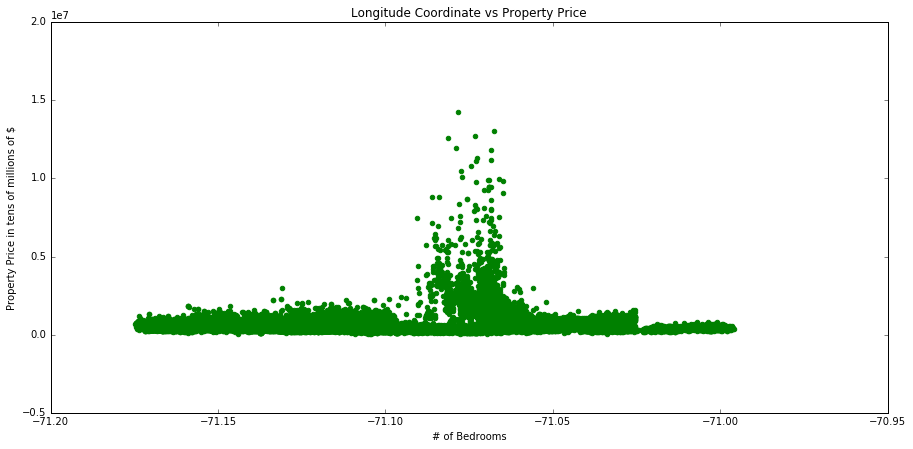

In [92]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(x["LONGITUDE"], y_clean, color="green")
plt.xlabel("# of Bedrooms")
plt.ylabel("Property Price in tens of millions of $")
plt.ylim(-.5e7, 2e7)
plt.title("Longitude Coordinate vs Property Price")

In [40]:
# append distance values to array
# drop correlated values 
x = x.drop('GROSS_AREA', 1)
x = x.drop("LAND_SF", 1)
x_distance = x.values
distance = np.array(distance).reshape(len(distance), 1)
x_distance = np.concatenate([x_distance, distance], axis = 1)

In [41]:
test = np.delete(x_distance,5,1)
lasso = Lasso(alpha=100)
lasso.fit(test,y_clean)
print "Model score:", lasso.score(test,y_clean)

Model score: 0.479838025738


In [42]:
ridge = Ridge(alpha=100)
ridge.fit(test,y_clean)
print "Model score:", ridge.score(test,y_clean)

Model score: 0.464336601698


In [43]:
linreg = LinearRegression()
linreg.fit(test,y_clean)
print "Model score Lasso:", linreg.score(test,y_clean)

Model score: 0.479937693057


In [48]:
residuals = abs(y_clean - lasso.predict(test))
avg_residuals = np.average(residuals)
print "Average Residual Ridge:", avg_residuals

Average Residual Ridge: 187500.324957


In [46]:
residuals = abs(y_clean - ridge.predict(test))
avg_residuals = np.average(residuals)
print "Average Residual Ridge:", avg_residuals

Average Residual: 187500.324957


In [47]:
residuals = abs(y_clean - linreg.predict(test))
avg_residuals = np.average(residuals)
print "Average Residual LinReg:", avg_residuals

Average Residual LinReg: 187945.115089


Decision Trees and Random Forests were unable to calculate results on this large dataset and my computer could not function as I attempted. See model and residual performance above